In [1]:
import os
import numpy as np
import pandas as pd

import my_dataloader

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hdfs_root = '/Users/d.volf/Documents/Projects/log_ml/benchmark_datasets/loglizer-master/data/HDFS'
hdfs_log = os.path.join(hdfs_root, 'HDFS_100k.log_structured.csv')
hdfs_label = os.path.join(hdfs_root, 'anomaly_label.csv')

In [3]:
(x_train, y_train), (x_test, y_test) = my_dataloader.load_HDFS(hdfs_log, label_file=hdfs_label, window='session',
                                                               train_ratio=0.5, split_type='uniform',
                                                               mod='USE', clean_text_flg=False)

====== Input data summary ======
Loading /Users/d.volf/Documents/Projects/log_ml/benchmark_datasets/loglizer-master/data/HDFS/HDFS_100k.log_structured.csv
Total: 7940 instances, 313 anomaly, 7627 normal
Train: 3969 instances, 156 anomaly, 3813 normal
Test: 3971 instances, 157 anomaly, 3814 normal



In [4]:
x = pd.DataFrame(np.concatenate((x_train, x_test), axis=0), columns=['messages'])
x['messages_str'] = [','.join(map(str, l)) for l in x.messages]
x['label'] = pd.DataFrame(np.concatenate((y_train, y_test), axis=0), columns=['label'])
x

,messages,messages_str,label
0,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0
1,"[Receiving block <*> src: /<*> dest: /<*>, BLO...","Receiving block <*> src: /<*> dest: /<*>,BLOCK...",0
2,"[Receiving block <*> src: /<*> dest: /<*>, Rec...","Receiving block <*> src: /<*> dest: /<*>,Recei...",0
3,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0
4,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0
...,...,...,...
7935,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0
7936,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0
7937,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0
7938,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0


In [5]:
x['number_messages'] = x.messages.str.len() 
x['number_symbols'] = x.messages_str.str.len() 
# x['number_messages2'] = x.messages_str.str.count(',')
x

,messages,messages_str,label,number_messages,number_symbols
0,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0,13,662
1,"[Receiving block <*> src: /<*> dest: /<*>, BLO...","Receiving block <*> src: /<*> dest: /<*>,BLOCK...",0,13,662
2,"[Receiving block <*> src: /<*> dest: /<*>, Rec...","Receiving block <*> src: /<*> dest: /<*>,Recei...",0,13,662
3,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0,13,662
4,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0,13,662
...,...,...,...,...,...
7935,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0,13,662
7936,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0,13,662
7937,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0,13,662
7938,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",0,13,662


In [6]:
type(x.number_messages)

pandas.core.series.Series

<AxesSubplot:>

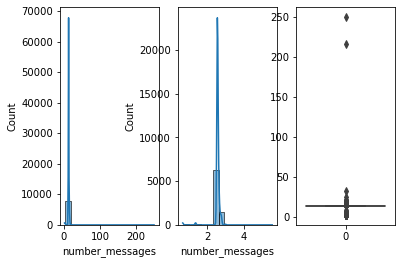

In [7]:
fig, axs = plt.subplots(ncols=3)
sns.histplot(data=x.number_messages, bins=15, kde=True, ax=axs[0])
sns.histplot(data=np.log(x.number_messages), bins=15, kde=True, ax=axs[1])
sns.boxplot(data=x.number_messages, ax=axs[2])

<AxesSubplot:>

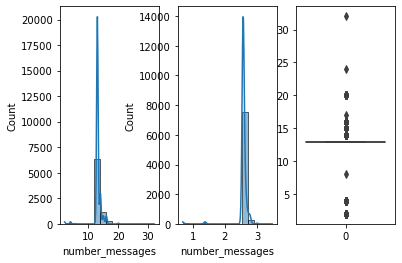

In [8]:
fig, axs = plt.subplots(ncols=3)
sns.histplot(data=x.number_messages[x.number_messages < 50],bins=15, kde=True, ax=axs[0])
sns.histplot(data=np.log(x.number_messages[x.number_messages < 50]), bins=15, kde=True, ax=axs[1])
sns.boxplot(data=x.number_messages[x.number_messages < 50], ax=axs[2])

<AxesSubplot:>

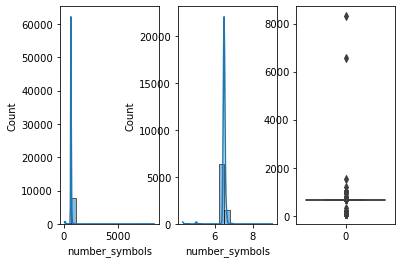

In [9]:
fig, axs = plt.subplots(ncols=3)
sns.histplot(data=x.number_symbols,bins=15, kde=True, ax=axs[0])
sns.histplot(data=np.log(x.number_symbols), bins=15, kde=True, ax=axs[1])
sns.boxplot(data=x.number_symbols, ax=axs[2])

<AxesSubplot:>

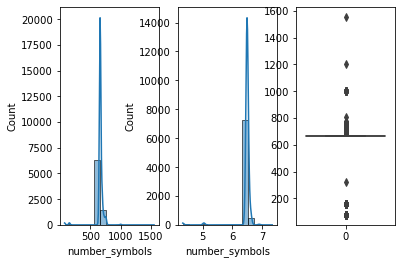

In [10]:
fig, axs = plt.subplots(ncols=3)
sns.histplot(data=x.number_symbols[x.number_symbols<2000],bins=15, kde=True, ax=axs[0])
sns.histplot(data=np.log(x.number_symbols[x.number_symbols<2000]), bins=15, kde=True, ax=axs[1])
sns.boxplot(data=x.number_symbols[x.number_symbols<2000], ax=axs[2])

In [11]:
x[x.number_messages>50]

,messages,messages_str,label,number_messages,number_symbols
690,"[Receiving block <*> src: /<*> dest: /<*>, BLO...","Receiving block <*> src: /<*> dest: /<*>,BLOCK...",1,216,6549
3723,"[Receiving block <*> src: /<*> dest: /<*>, BLO...","Receiving block <*> src: /<*> dest: /<*>,BLOCK...",0,249,8303


In [12]:
anomalies = x.loc[x.label == 1]
anomalies

anomalies_dict = []
for ind, row in anomalies.iterrows():
    anomalies_dict.extend(row.messages_str.split(','))
anomalies_dict = set(anomalies_dict)
anomalies_dict

{'<*> Served block <*> to /<*>',
 '<*> Starting thread to transfer block <*> to <*>',
 '<*>:Transmitted block <*> to /<*>',
 'BLOCK* NameSystem.addStoredBlock: Redundant addStoredBlock request received for <*> on <*> size <*>',
 'BLOCK* NameSystem.addStoredBlock: blockMap updated: <*> is added to <*> size <*>',
 'BLOCK* NameSystem.allocateBlock:<*>',
 'BLOCK* ask <*> to replicate <*> to datanode(s) <*>',
 'Changing block file offset of block <*> from <*> to <*> meta file offset to <*>',
 'Deleting block <*> file <*>',
 'Exception in receiveBlock for block <*> <*>',
 'PacketResponder <*> <*> Exception <*>',
 'PacketResponder <*> for block <*> Interrupted.',
 'PacketResponder <*> for block <*> terminating',
 'Received block <*> of size <*> from /<*>',
 'Received block <*> src: /<*> dest: /<*> of size <*>',
 'Receiving block <*> src: /<*> dest: /<*>',
 'Receiving empty packet for block <*>',
 'Verification succeeded for <*>',
 'writeBlock <*> received exception <*>'}

In [13]:
normal = x.loc[x.label == 0]
normal

normal_dict = []
for ind, row in normal.iterrows():
    normal_dict.extend(row.messages_str.split(','))
normal_dict = set(normal_dict)
normal_dict

{'<*> Served block <*> to /<*>',
 '<*> Starting thread to transfer block <*> to <*>',
 '<*>:Transmitted block <*> to /<*>',
 'BLOCK* NameSystem.addStoredBlock: blockMap updated: <*> is added to <*> size <*>',
 'BLOCK* NameSystem.allocateBlock:<*>',
 'BLOCK* ask <*> to replicate <*> to datanode(s) <*>',
 'Deleting block <*> file <*>',
 'PacketResponder <*> for block <*> terminating',
 'Received block <*> of size <*> from /<*>',
 'Received block <*> src: /<*> dest: /<*> of size <*>',
 'Receiving block <*> src: /<*> dest: /<*>',
 'Verification succeeded for <*>'}

In [14]:
error_messages = set(anomalies_dict - normal_dict)

In [15]:
error_messages

{'BLOCK* NameSystem.addStoredBlock: Redundant addStoredBlock request received for <*> on <*> size <*>',
 'Changing block file offset of block <*> from <*> to <*> meta file offset to <*>',
 'Exception in receiveBlock for block <*> <*>',
 'PacketResponder <*> <*> Exception <*>',
 'PacketResponder <*> for block <*> Interrupted.',
 'Receiving empty packet for block <*>',
 'writeBlock <*> received exception <*>'}

In [16]:
x['messages_str_split'] = x.messages_str.apply(lambda r: r.split(','))
x['error_messages'] = x.messages_str_split.apply(lambda r: set(r) & error_messages)
x[x.error_messages != set()]

,messages,messages_str,label,number_messages,number_symbols,messages_str_split,error_messages
95,"[Receiving block <*> src: /<*> dest: /<*>, BLO...","Receiving block <*> src: /<*> dest: /<*>,BLOCK...",1,4,155,"[Receiving block <*> src: /<*> dest: /<*>, BLO...",{writeBlock <*> received exception <*>}
175,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
179,"[Receiving block <*> src: /<*> dest: /<*>, Rec...","Receiving block <*> src: /<*> dest: /<*>,Recei...",1,8,321,"[Receiving block <*> src: /<*> dest: /<*>, Rec...","{writeBlock <*> received exception <*>, Packet..."
537,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
584,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
...,...,...,...,...,...,...,...
4108,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
4109,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
4116,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,14,762,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{BLOCK* NameSystem.addStoredBlock: Redundant a...
4119,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,32,1551,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","{writeBlock <*> received exception <*>, Packet..."


In [17]:
x[x.label == 1]

,messages,messages_str,label,number_messages,number_symbols,messages_str_split,error_messages
5,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
77,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
95,"[Receiving block <*> src: /<*> dest: /<*>, BLO...","Receiving block <*> src: /<*> dest: /<*>,BLOCK...",1,4,155,"[Receiving block <*> src: /<*> dest: /<*>, BLO...",{writeBlock <*> received exception <*>}
97,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,2,76,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
137,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,2,76,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
...,...,...,...,...,...,...,...
4121,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,20,998,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
4122,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
4123,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
4124,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}


In [18]:
x[(x.label == 1) & (x.error_messages != set([]))]

,messages,messages_str,label,number_messages,number_symbols,messages_str_split,error_messages
95,"[Receiving block <*> src: /<*> dest: /<*>, BLO...","Receiving block <*> src: /<*> dest: /<*>,BLOCK...",1,4,155,"[Receiving block <*> src: /<*> dest: /<*>, BLO...",{writeBlock <*> received exception <*>}
175,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
179,"[Receiving block <*> src: /<*> dest: /<*>, Rec...","Receiving block <*> src: /<*> dest: /<*>,Recei...",1,8,321,"[Receiving block <*> src: /<*> dest: /<*>, Rec...","{writeBlock <*> received exception <*>, Packet..."
537,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
584,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
...,...,...,...,...,...,...,...
4108,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
4109,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,4,155,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{writeBlock <*> received exception <*>}
4116,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,14,762,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{BLOCK* NameSystem.addStoredBlock: Redundant a...
4119,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,32,1551,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","{writeBlock <*> received exception <*>, Packet..."


In [19]:
x[(x.label == 1) & (x.error_messages == set([]))]

,messages,messages_str,label,number_messages,number_symbols,messages_str_split,error_messages
5,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
77,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
97,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,2,76,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
137,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,2,76,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
240,"[Receiving block <*> src: /<*> dest: /<*>, Rec...","Receiving block <*> src: /<*> dest: /<*>,Recei...",1,13,662,"[Receiving block <*> src: /<*> dest: /<*>, Rec...",{}
...,...,...,...,...,...,...,...
4120,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
4121,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,20,998,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
4122,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}
4123,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...","BLOCK* NameSystem.allocateBlock:<*>,Receiving ...",1,13,662,"[BLOCK* NameSystem.allocateBlock:<*>, Receivin...",{}


In [20]:
# TF-IDF model

# Little dataset (Total: 7940 instances, 313 anomaly, 7627 normal)
# Full dataset (Total: 575061 instances, 16838 anomaly, 558223 normal)

# Little dataset:
# OrderedDict([('XGBoost', {'precision': 0.9852941176470589, 'recall': 0.4267515923566879, 'f1': 0.5955555555555555}),
# ('RandomForest', {'precision': 0.9852941176470589, 'recall': 0.4267515923566879, 'f1': 0.5955555555555555}), 
# ('LinearSVM', {'precision': 0.9852941176470589, 'recall': 0.4267515923566879, 'f1': 0.5955555555555555}), 
# ('SVM', {'precision': 0.967032967032967, 'recall': 0.5605095541401274, 'f1': 0.7096774193548387}), 
# ('CatBoost', {'precision': 0.9693877551020408, 'recall': 0.6050955414012739, 'f1': 0.7450980392156862}), 
# ('IsolationForest', {'precision': 0.941747572815534, 'recall': 0.6178343949044586, 'f1': 0.7461538461538462}), 
# ('OneSVM', {'precision': 0.97, 'recall': 0.6178343949044586, 'f1': 0.754863813229572}), 
# ('SGDoneSVM', {'precision': 0.97, 'recall': 0.6178343949044586, 'f1': 0.754863813229572})])

# Full dataset
# [('OneSVM', {'precision': 0.035771606974034253, 'recall': 0.9662667775270222, 'f1': 0.06898920427080064}),
# ('IsolationForest', {'precision': 0.1646695244741302, 'recall': 0.9809953676208576, 'f1': 0.28200225355959985}),
# ('SGDoneSVM', {'precision': 0.3920792079207921, 'recall': 0.9642475353367383, 'f1': 0.5574783683559951}),
# ('RandomForest', {'precision': 0.9991286668602962, 'recall': 0.40859959615156194, 'f1': 0.5800033721126285}),
# ('CatBoost', {'precision': 0.894896648370898, 'recall': 0.9102031120085521, 'f1': 0.9024849841008126}),
# ('LinearSVM', {'precision': 0.9602474510253179, 'recall': 0.9956051787623234, 'f1': 0.9776067179846046}),
# ('SVM', {'precision': 0.9931222577967509, 'recall': 0.9947737260957359, 'f1': 0.9939473059577499}),
# ('XGBoost', {'precision': 0.9972713251868549, 'recall': 0.9984558736191946, 'f1': 0.997863247863248})])

# USE - model
# Little dataset
# Precision: 0.985, recall: 0.427, F1-measure: 0.596

# Full dataset
# Precision: 0.993, recall: 0.979, F1-measure: 0.986

# BERT - model
# Little dataset
# Precision: 0.947, recall: 0.459, F1-measure: 0.618 - 'all-MiniLM-L6-v2'
# Precision: 1.000, recall: 0.439, F1-measure: 0.611 - 'stsb-roberta-large' - 7836.83562374115 seconds for embedding



# dmesg, health, pacemaker, messages